# Edible and Poisonous Mushrooms Dataset

* In mushroom dataset total 22 features are available and all of them are categorical.

### Features are:
* 1. Cap-Shape
* 2. Cap-surface
* 3. Cap-color
* 4. Bruises
* 5. Odor
* 6. Gill-attachment
* 7. Gill-spacing
* 8. Gill-color
* 9. Stalk-shape
* 10.Stalk-root
* 11.Stalk-surface-above-ring
* 12.Stalk-surface-below-ring
* 13.Stalk-color-above-ring
* 14.Stalk-color-below-ring
* 15.Veil-type
* 16.Ring-number
* 17.Ring-type
* 18.Spore-print-color
* 19.Population
* 20.Habitat

# Things to do
* 1. Uploading dataset
* 2. Exploratory Data Analysis
* 3. Hyperparameter optimization
*  a. RandomForestClassifier
*  b. XGBClassifier
* 3. Model deployment using:
*  a. RandomForestClassifier
*  b. XGBClassifier      


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV



%matplotlib inline

# Uploading Dataset

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

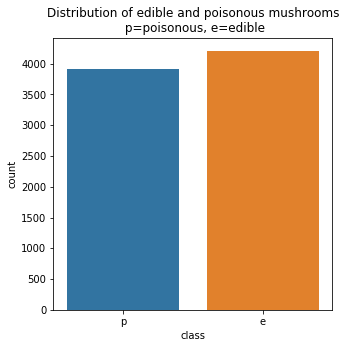

In [5]:
plt.figure(figsize=(5,5))
sns.countplot(df['class'])
plt.title("Distribution of edible and poisonous mushrooms\n p=poisonous, e=edible")
plt.show()


In [6]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

## No Missing value found
## No imbalanced dataset

In [7]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Exploratory Data Analysis

In [8]:
cat_feature=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor']

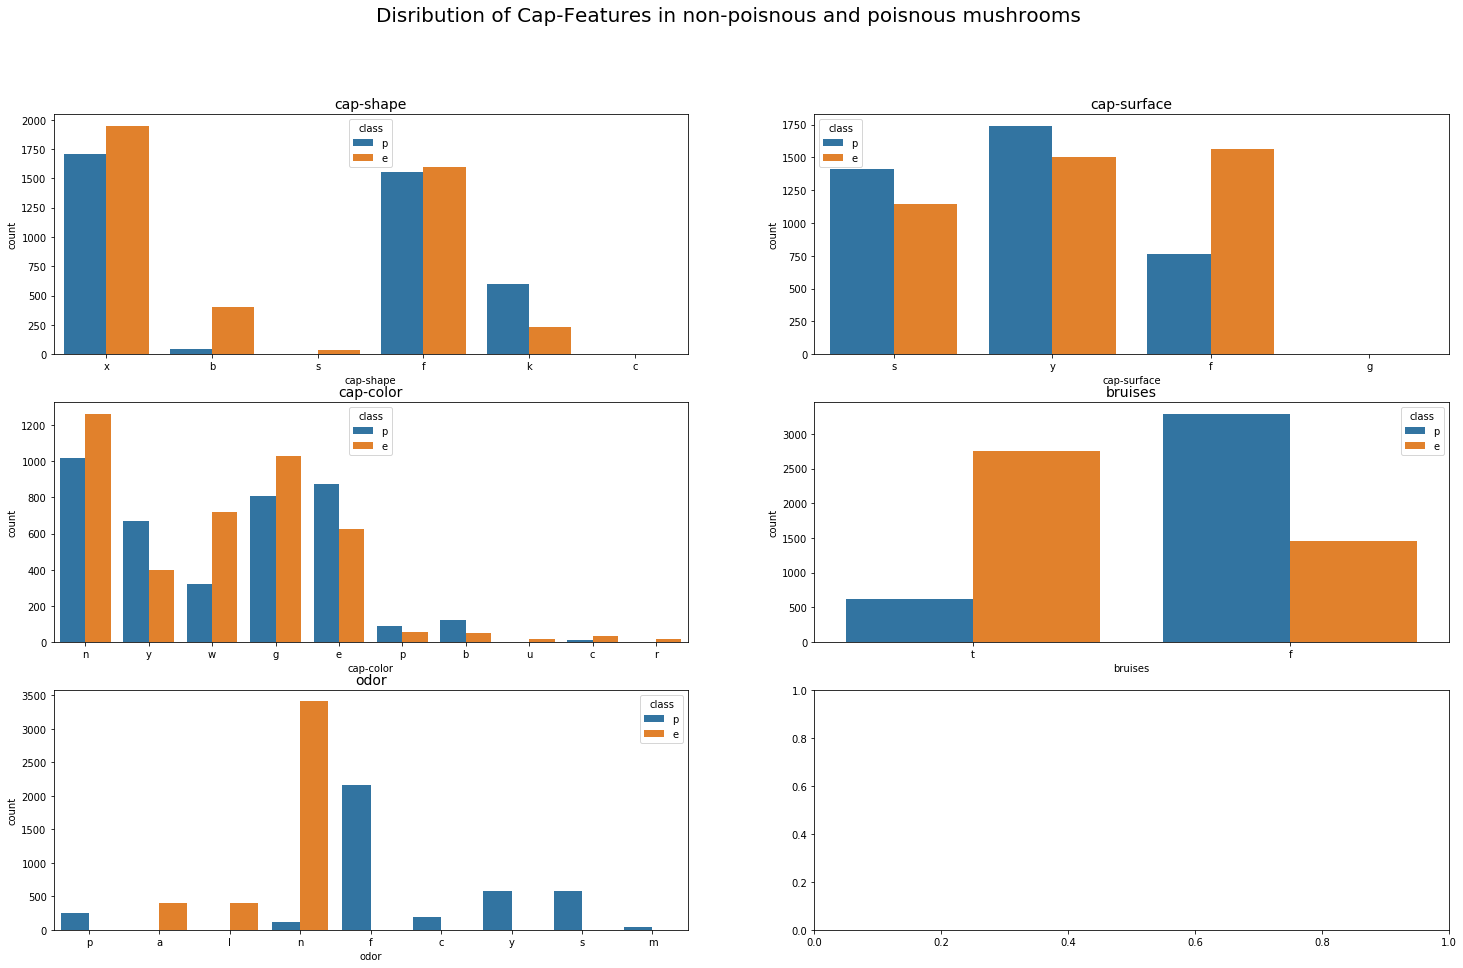

In [9]:
fig, ax=plt.subplots(3, 2, figsize=(25,15))
for i in range(5):
    sns.countplot(cat_feature[i], hue='class', data=df, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(cat_feature[i], fontsize=14)
    
fig.suptitle("Disribution of Cap-Features in non-poisnous and poisnous mushrooms", fontsize=20)
plt.show()

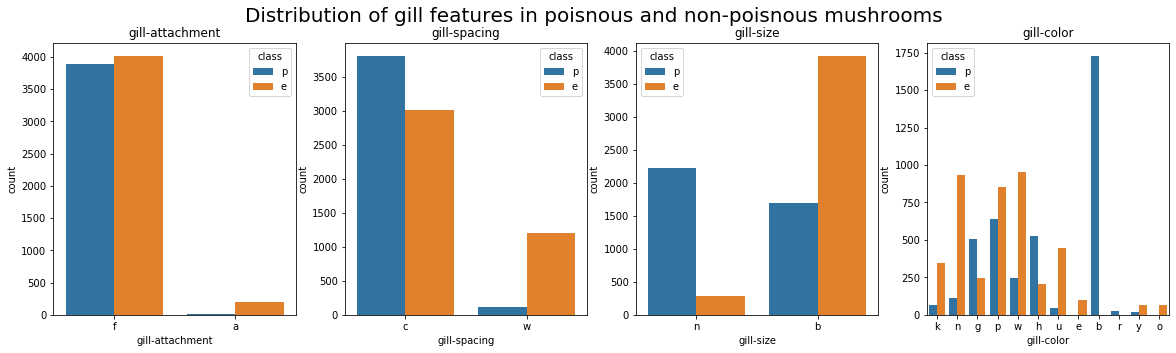

In [10]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
sns.countplot('gill-attachment', hue='class', data=df, ax=ax[0])
ax[0].set_title('gill-attachment')

sns.countplot('gill-spacing', hue='class', data=df, ax=ax[1])
ax[1].set_title('gill-spacing')

sns.countplot('gill-size',hue='class', data=df, ax=ax[2])
ax[2].set_title('gill-size')

sns.countplot('gill-color',hue='class', data=df, ax=ax[3])
ax[3].set_title('gill-color')
fig.suptitle("Distribution of gill features in poisnous and non-poisnous mushrooms", fontsize=20)

plt.show()

In [11]:
features=['stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color']

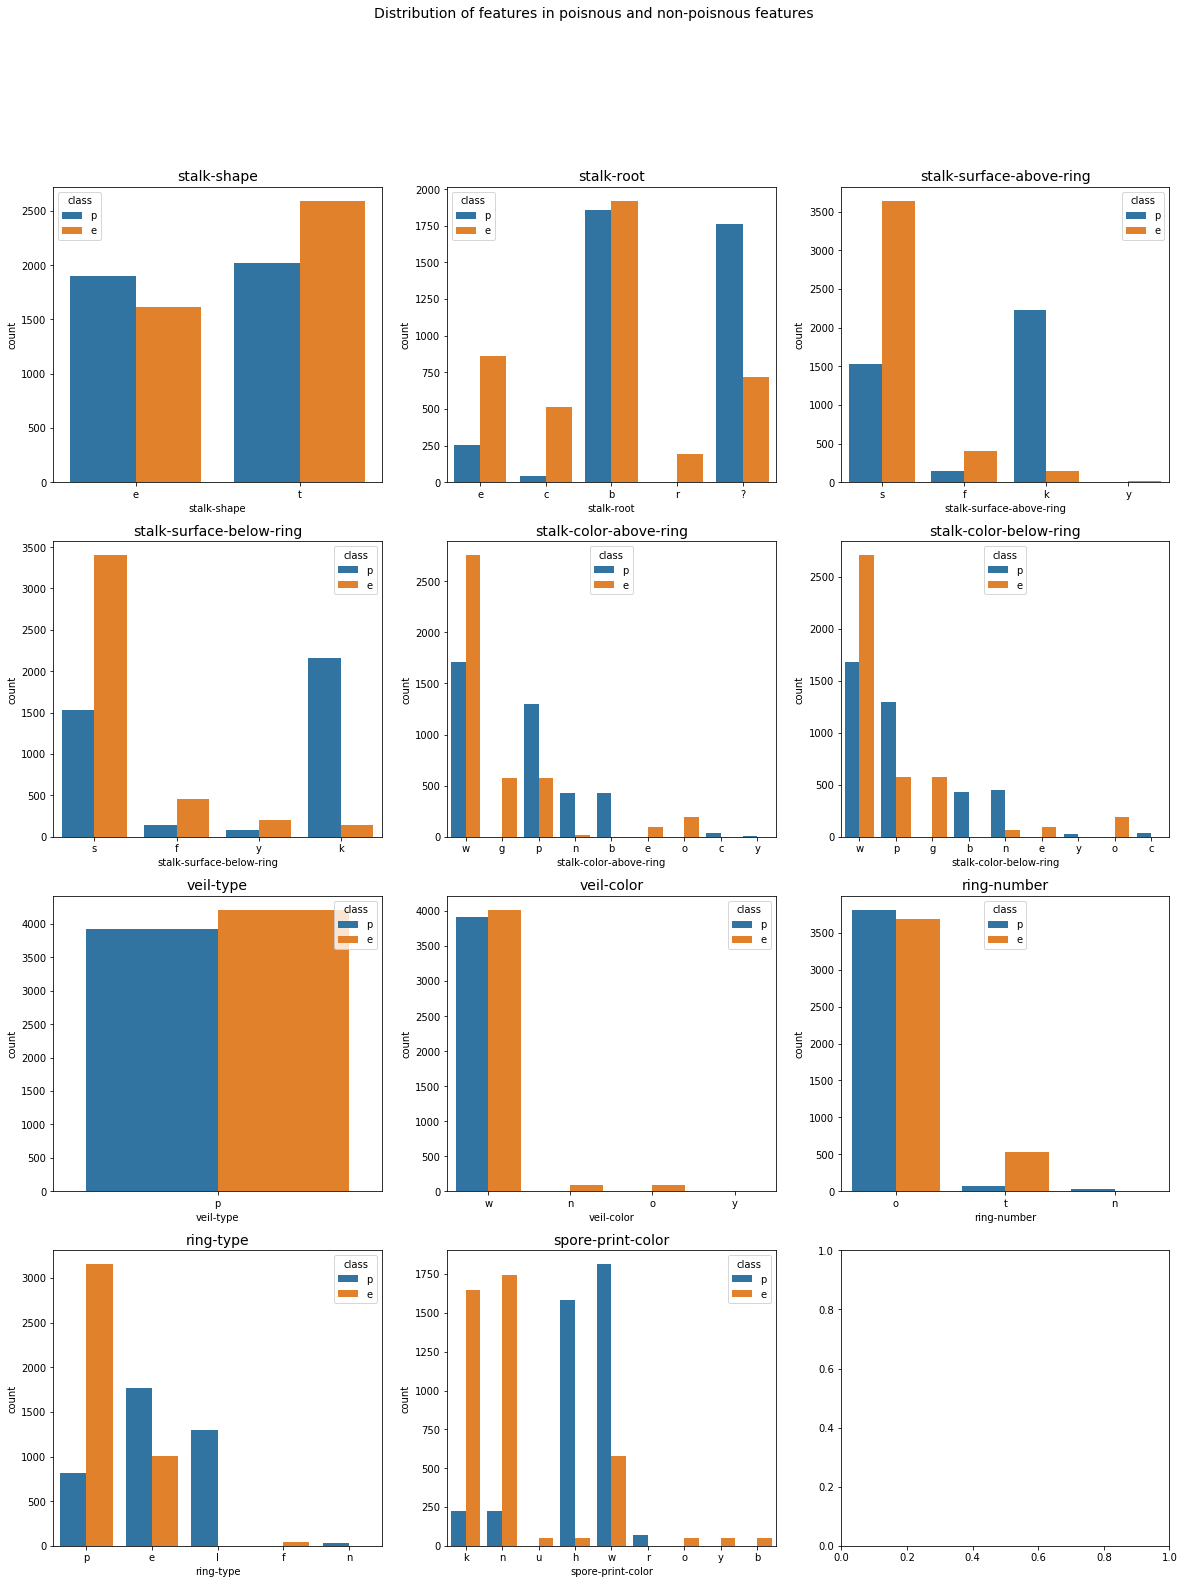

In [12]:
fig, ax=plt.subplots(4,3, figsize=(20,25))
for i in range(11):
    sns.countplot(features[i], hue='class',data=df, ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(features[i], fontsize=14)
plt.suptitle("Distribution of features in poisnous and non-poisnous features", fontsize=14)
plt.show()

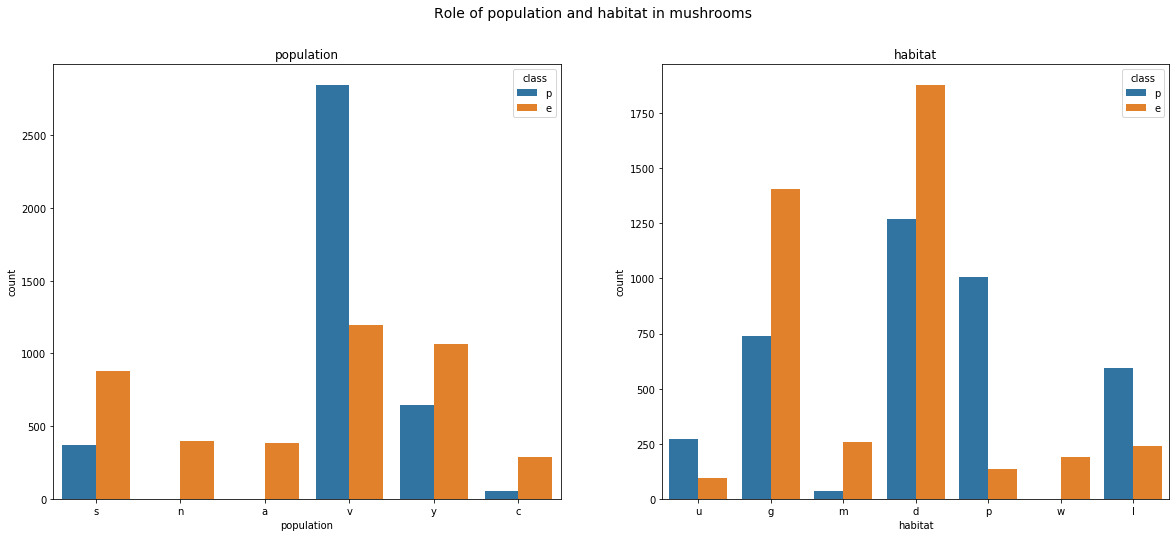

In [13]:
fig, ax=plt.subplots(1,2, figsize=(20,8))

sns.countplot('population', hue='class',data=df, ax=ax[0])
ax[0].set_title('population')

sns.countplot('habitat', hue='class', data=df, ax=ax[1])
ax[1].set_title('habitat')

plt.suptitle("Role of population and habitat in mushrooms", fontsize=14)
plt.show()

In [14]:
columns=df.columns.values
for column in columns:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [15]:
X=df.drop(['class'], axis=1)
y=df['class']

In [16]:
parameters={'min_samples_leaf':[20,25]}
forest=RandomForestClassifier(max_depth=15, n_estimators=15)
grid=GridSearchCV(forest, parameters, cv=3, n_jobs=-1, verbose=2, scoring=make_scorer(roc_auc_score))

In [17]:
grid.fit(X,y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    3.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.1s finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=15, n_estimators=15),
             n_jobs=-1, param_grid={'min_samples_leaf': [20, 25]},
             scoring=make_scorer(roc_auc_score), verbose=2)

In [18]:
grid.best_estimator_


RandomForestClassifier(max_depth=15, min_samples_leaf=20, n_estimators=15)

In [19]:
grid.best_score_

0.8391459670848627

In [20]:
grid.best_params_

{'min_samples_leaf': 20}

In [21]:
top_features=10

In [22]:
imp_feature=grid.best_estimator_.feature_importances_
idx=np.argsort(imp_feature)[::-1][0:top_features]
feature_name=df.drop('class', axis=1).columns.values

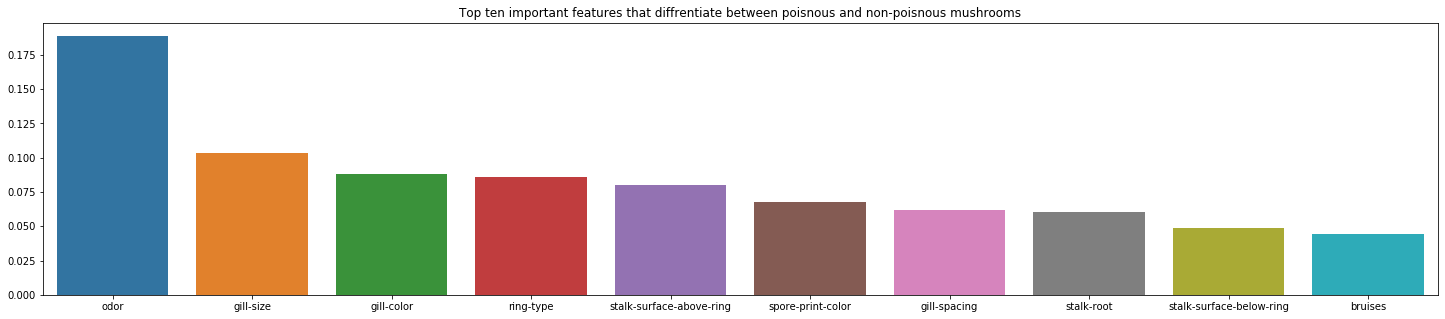

In [23]:
plt.figure(figsize=(25,5))
sns.barplot(x=feature_name[idx], y=imp_feature[idx])
plt.title("Top ten important features that diffrentiate between poisnous and non-poisnous mushrooms")
plt.show()

# Hyperparameter optimization

* RandomForestClassifier
* XGBClassifier

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# 1. RandomForestClassifier

In [25]:
rf=RandomForestClassifier()
rf_param={"n_estimators": list(range(100,500)),
         "criterion":['gini','entropy'],
         "max_depth": list(range(1,10)),
         "max_samples":list(range(1,10))}
random_search=RandomizedSearchCV(rf, rf_param, n_jobs=-1, n_iter=10, scoring='accuracy', verbose=2)

In [26]:
random_search.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.2s finished


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_samples': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9],
                                        'n_estimators': [100, 101, 102, 103,
                                                         104, 105, 106, 107,
                                                         108, 109, 110, 111,
                                                         112, 113, 114, 115,
                                                         116, 117, 118, 119,
                                                         120, 121, 122, 123,
                                                         124, 125, 126, 127,
                                             

In [27]:
print("Random Forest Classifier Best estimator is :", random_search.best_estimator_)
print("Random Forest Classifier Best parameter is :", random_search.best_params_)
print("Random Forest Classifier Best score is :", random_search.best_score_)
print("Random Forest Classifier Best index is :", random_search.best_index_)

Random Forest Classifier Best estimator is : RandomForestClassifier(criterion='entropy', max_depth=3, max_samples=4,
                       n_estimators=467)
Random Forest Classifier Best parameter is : {'n_estimators': 467, 'max_samples': 4, 'max_depth': 3, 'criterion': 'entropy'}
Random Forest Classifier Best score is : 0.8865136036377417
Random Forest Classifier Best index is : 2


In [28]:
rf=RandomForestClassifier(n_estimators=195, max_samples= 3, max_depth= 7, criterion='gini')
rf.fit(X_train,y_train)                          

RandomForestClassifier(max_depth=7, max_samples=3, n_estimators=195)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
print("Accuracy score for Random Forest Classifier is:",round(accuracy_score(rf.predict(X_test), y_test)*100,2),'%')

Accuracy score for Random Forest Classifier is: 89.23 %


# 2.XGBClassifier

In [31]:
xgb_param={"n_estimators":list(range(100, 500)),
          "max_depth":list(range(1,10)) ,
          "learning_rate":[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,0.009, 0.05, 0.09] ,
          "min_child_weight":list(range(1,10))}

In [32]:
xgb=XGBClassifier()
random_search=RandomizedSearchCV(xgb, xgb_param, n_iter=10, n_jobs=-1, cv=5, verbose=2)
random_search.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.3s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           verbosity=None),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.002, 0.003,
            

In [33]:
print("XGBClassifier best estimator is :", random_search.best_estimator_)
print("XGBClassifier best parameters is :", random_search.best_params_)
print("XGBClassifier best score is :", random_search.best_score_)
print("XGBClassifer best index is", random_search.best_index_)

XGBClassifier best estimator is : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.002, max_delta_step=0, max_depth=2,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=464, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
XGBClassifier best parameters is : {'n_estimators': 464, 'min_child_weight': 7, 'max_depth': 2, 'learning_rate': 0.002}
XGBClassifier best score is : 0.8946328154604017
XGBClassifer best index is 1


In [34]:
xgb=XGBClassifier(n_estimators=147, min_child_weight= 4, max_depth=1, learning_rate=0.05)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=1,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=147, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
print("Accuracy score for XGB Classifier is:", round(accuracy_score(xgb.predict(X_test), y_test)*100,2),"%")

Accuracy score for XGB Classifier is: 98.4 %
